### Prepared By:

- Christina Montasser 20190382 S3
- Esraa Yazid 20190093 S1
- Mariam Ihab 20190801 S1
- Mirette Amin 20190570 S3
- Nader Atef 20190575 S3

`Group Number: 28`


In [ ]:
# %pip install opendatasets

In [1]:
# import opendatasets as od
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset
df = pd.read_csv("./smoke_detection_iot.csv")

In [3]:
class PCA:
    def __init__(self, n):
        self.num_comopnents = n
        self.__covMat = 0
        self.__eigenVec = 0
        self.__eigenVals = 0
        self.mean = 0

    def fit(self, data):
        # rowvar makes meanedData transposed
        self.mean = np.mean(data, axis=0)
        meanedData = data - self.mean
        self.__covMat = np.cov(meanedData, rowvar=False)
        self.__eigenVals, self.__eigenVec = np.linalg.eigh(self.__covMat)

        # Sort Eigen Vectors and Eigen Values
        idx_sorted = np.argsort(self.__eigenVals)[::-1]
        self.__eigenVals = self.__eigenVals[idx_sorted]
        self.__eigenVec = self.__eigenVec[:, idx_sorted]

    def getCovarianceMat(self):
        return self.__covMat

    def getEigenVectors(self):
        return self.getEigenVectors

    def getEigenVals(self):
        return self.getEigenVals

    def transform(self, data):
        subset = self.__eigenVec[:, 0 : self.num_comopnents]
        meanedData = data - self.mean
        reduced = np.dot(subset.transpose(), meanedData.transpose()).transpose()
        return reduced

    def fit_transform(self, data):
        self.fit(data)
        res = self.transform(data)
        return res

In [4]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
df = pd.read_csv("smoke_detection_iot.csv")
df.drop(["Unnamed: 0", "UTC", "CNT"], axis=1, inplace=True)
y = df.pop("Fire Alarm").to_numpy()
X = df
scaler = StandardScaler()
# Splitting Data
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.3, shuffle=True)
x_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [13]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0


In [9]:
# using 2 components only for visualization we can do more
pcaVis = PCA(2)
trainPCA_vis = pcaVis.fit_transform(x_scaled)
testPCA_vis = pcaVis.transform(x_test_scaled)

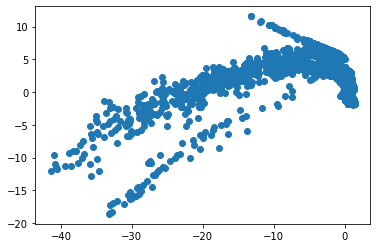

In [10]:
import matplotlib.pyplot as plt

plt.scatter(trainPCA_vis[:, 0], trainPCA_vis[:, 1])
plt.show()

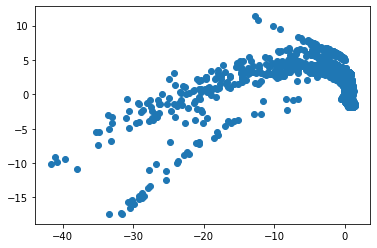

In [11]:
import matplotlib.pyplot as plt

plt.scatter(testPCA_vis[:, 0], testPCA_vis[:, 1])
plt.show()

In [73]:
class Competitive_Net:
    def __init__(self, clusters: int):
        self.clusters_nb = clusters
        self.weights = None

    def fit(self, X_train: float, epochs: int, learning_rate: float):
        self.weights = np.random.rand(self.clusters_nb, X_train.shape[1])
        self.weights = preprocessing.normalize(self.weights, norm="l2")
        for epoch in range(epochs):
            rand_idx = np.random.default_rng().integers(len(X_train))
            input = X_train[rand_idx]
            z = np.dot(self.weights, input.T)
            winner_idx = np.argmax(z)
            self.weights[winner_idx] = self.weights[winner_idx] + learning_rate * (input - self.weights[winner_idx])
            self.weights = preprocessing.normalize(self.weights, norm="l2")

            X_train[rand_idx] = preprocessing.normalize(X_train[rand_idx].reshape(1, -1), norm="l2")
            print("Epoch: ", epoch)
        return self.weights

In [74]:
net =  Competitive_Net(2)

In [75]:
# Without PCA
net.fit(x_scaled, 20, 0.003)

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19


array([[5.54127853e-01, 9.87510309e-02, 3.28488557e-01, 1.17727977e-01,
        3.01257725e-01, 4.94072929e-01, 2.37234990e-01, 1.08363197e-01,
        2.82946233e-01, 2.23068296e-01, 1.66660971e-01, 3.07365277e-02],
       [7.66849371e-02, 4.33394205e-01, 4.19418842e-04, 4.05814105e-01,
        4.36470723e-01, 1.97617804e-01, 4.45067111e-01, 1.74844147e-01,
        3.18939529e-01, 2.83252075e-01, 2.09216645e-03, 3.78204193e-02]])

In [76]:
# With PCA
net.fit(trainPCA_vis, 20, 0.003)

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19


array([[0.32083823, 0.94713401],
       [0.70408954, 0.7101112 ]])